In [134]:
#Question1

import pandas as pd
import math
import numpy as np
import matplotlib
import thinkstats2
import thinkplot

In [135]:
df = pd.read_csv("basketball_players.csv")

In [136]:
df.head()

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
0,abramjo01,1946,1,PIT,NBA,47,0,0,527,0,...,0,0,0,0,0,0,0,0,0,NaN
1,aubucch01,1946,1,DTF,NBA,30,0,0,65,0,...,0,0,0,0,0,0,0,0,0,NaN
2,bakerno01,1946,1,CHS,NBA,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,baltihe01,1946,1,STB,NBA,58,0,0,138,0,...,0,0,3,10,2,1,0,0,0,NaN
4,barrjo01,1946,1,STB,NBA,58,0,0,295,0,...,0,0,0,0,0,0,0,0,0,NaN


In [137]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [138]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [139]:
df

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
0,abramjo01,1946,1,PIT,NBA,47,0,0,527,0,...,0,0,0,0,0,0,0,0,0,NaN
1,aubucch01,1946,1,DTF,NBA,30,0,0,65,0,...,0,0,0,0,0,0,0,0,0,NaN
2,bakerno01,1946,1,CHS,NBA,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,baltihe01,1946,1,STB,NBA,58,0,0,138,0,...,0,0,3,10,2,1,0,0,0,NaN
4,barrjo01,1946,1,STB,NBA,58,0,0,295,0,...,0,0,0,0,0,0,0,0,0,NaN
5,baumhfr01,1946,1,CLR,NBA,45,0,0,631,0,...,0,0,0,0,0,0,0,0,0,NaN
6,beckemo01,1946,1,PIT,NBA,17,0,0,108,0,...,0,0,0,0,0,0,0,0,0,NaN
7,beckemo01,1946,2,BOS,NBA,6,0,0,13,0,...,0,0,0,0,0,0,0,0,0,NaN
8,beckemo01,1946,3,DTF,NBA,20,0,0,41,0,...,0,0,0,0,0,0,0,0,0,NaN
9,beendha01,1946,1,PRO,NBA,58,0,0,713,0,...,0,0,0,0,0,0,0,0,0,NaN


In [140]:
df.columns

Index([u'playerID', u'year', u'stint', u'tmID', u'lgID', u'GP', u'GS',
       u'minutes', u'points', u'oRebounds', u'dRebounds', u'rebounds',
       u'assists', u'steals', u'blocks', u'turnovers', u'PF', u'fgAttempted',
       u'fgMade', u'ftAttempted', u'ftMade', u'threeAttempted', u'threeMade',
       u'PostGP', u'PostGS', u'PostMinutes', u'PostPoints', u'PostoRebounds',
       u'PostdRebounds', u'PostRebounds', u'PostAssists', u'PostSteals',
       u'PostBlocks', u'PostTurnovers', u'PostPF', u'PostfgAttempted',
       u'PostfgMade', u'PostftAttempted', u'PostftMade', u'PostthreeAttempted',
       u'PostthreeMade', u'note'],
      dtype='object')

In [141]:
nbaDf = df.loc[df['lgID'] == 'NBA']
nbaDf =nbaDf.loc[nbaDf['year'] == 1995]

assists = nbaDf['assists']
#assists.replace(0, np.nan,inplace=True)
assists.dropna(inplace=True)
steals = nbaDf['steals']
#steals.replace(0, np.nan,inplace=True)
steals.dropna(inplace=True)

In [142]:
assists.head(5)

13304    389
13305     67
13306     30
13307    121
13308     49
Name: assists, dtype: int64

In [143]:
steals.head(5)

13304    64
13305    21
13306     9
13307    27
13308    21
Name: steals, dtype: int64

In [144]:
#question3
steals.size

489

In [145]:
assists.size

489

In [146]:
steals.mean()

38.756646216768914

In [147]:
assists.mean()

110.32719836400818

In [148]:
SpearmanCorr(assists,steals)

0.9156614324135106

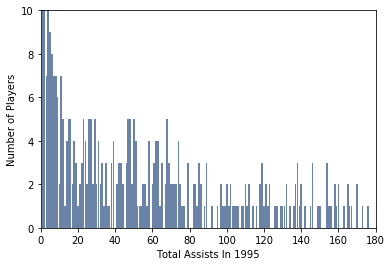

<Figure size 576x432 with 0 Axes>

In [149]:
assists.replace(0, np.nan, inplace=True)
assists.dropna(inplace=True)
hist = thinkstats2.Hist(assists, label='Assists In 1995')
axis = [0, 180, 0, 10]
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Total Assists In 1995', ylabel='Number of Players', axis= axis)
#X ekseni : o yıl içinde o kadar assists yapılmış, y ekseni kaç kişi o kadar assists yapmış onu gösteriyo

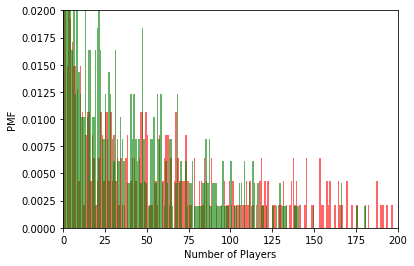

<Figure size 576x432 with 0 Axes>

In [150]:
assists_pmf = thinkstats2.Pmf(assists, label='assists')
steals_pmf = thinkstats2.Pmf(steals, label='steals')

thinkplot.PrePlot(2)
thinkplot.Hist(assists_pmf, align='right', color='red')
thinkplot.Hist(steals_pmf, align='left', color='green')
thinkplot.Show(xlabel='Number of Players', ylabel='PMF',axis=[0,200,0,0.02])

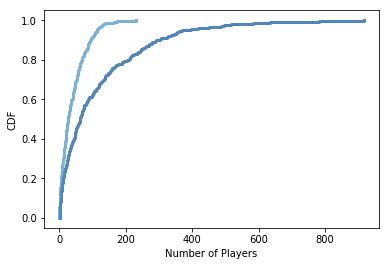

<Figure size 576x432 with 0 Axes>

In [151]:
assists_cdf = thinkstats2.Cdf(assists, label='assists')
steals_cdf = thinkstats2.Cdf(steals, label='steals')

thinkplot.PrePlot(2)
thinkplot.Cdfs([assists_cdf, steals_cdf])
thinkplot.Show(xlabel='Number of Players', ylabel='CDF')
#steal daha zor yapılan bir şey dolayısıyla stealın fazla olması daha düşük ihtimal o yüzden git gide daha zor 1 oluyor

In [152]:
#resample = live_cdf.Sample(1000)
#thinkplot.Cdf(live_cdf)
#thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
#thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='CDF')

In [153]:
#Question4
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [154]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

In [155]:
mediana = assists_cdf.Percentile(50)
mediana


62.0

In [156]:
medians = steals_cdf.Percentile(50)
medians

27

In [157]:
percentiles_asists = (assists_cdf.Percentile(25),assists_cdf.Percentile(50),assists_cdf.Percentile(75))
percentiles_asists


(18.0, 62.0, 158.0)

In [158]:
percentiles_steals = (steals_cdf.Percentile(25),steals_cdf.Percentile(50),steals_cdf.Percentile(75))
percentiles_steals

(8, 27, 58)

In [159]:
sample = np.random.choice(assists, 100, replace=True)
ranks = [assists_cdf.PercentileRank(x) for x in sample]

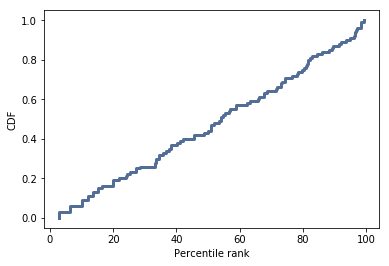

<Figure size 576x432 with 0 Axes>

In [160]:

rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='Percentile rank', ylabel='CDF')

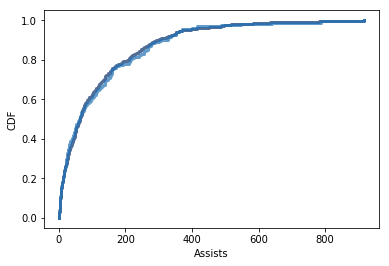

In [161]:

resample = assists_cdf.Sample(200)
thinkplot.Cdf(assists_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Assists', ylabel='CDF')

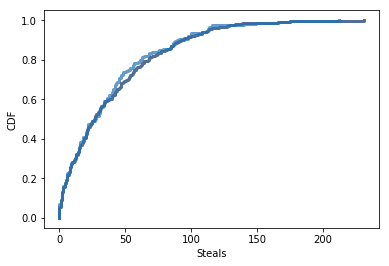

In [162]:

resample = steals_cdf.Sample(200)
thinkplot.Cdf(steals_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Steals', ylabel='CDF')

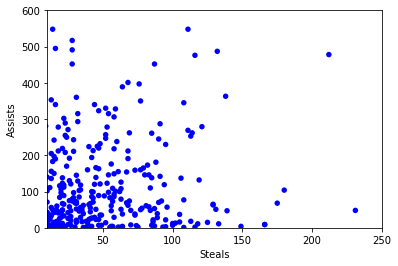

<Figure size 576x432 with 0 Axes>

In [163]:
#Question5
def ScatterPlot(steals, assists, alpha=1.0, s=20):

    thinkplot.Scatter(steals, assists, alpha=alpha)
    thinkplot.Show(xlabel='Steals',
                     ylabel='Assists',
                     xlim=[10, 250],
                     ylim=[0, 600],
                     legend=False)

ScatterPlot(steals.head(400), assists.head(400), alpha=1.0, s=10)

In [164]:
#Question6
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=2000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [165]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [166]:
cleaned = nbaDf.dropna(subset=['steals', 'assists'])
data = cleaned.steals.values, cleaned.assists.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [167]:
ht.actual, ht.MaxTestStat()


(0.8011742255131805, 0.1495652447559473)